In [184]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [185]:
# Reading in the data
housing_df = pd.read_csv("combined_data_clean.csv")
housing_df.head()

,id,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate
0,1,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0,4.1
1,2,400000,5109 E THOMAS RD,85018,Active,6243667,PAPAGO VILLAGE,1943,0,0.0,1358.0,2.2
2,3,399900,8020 W STELLA AVE,85303,Active,6384821,SHALIMAR,1997,3,2.0,1505.0,0.0
3,4,349000,6944 W Verde LN,85033,Active,6395738,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0,3.0
4,5,419000,4105 W PASADENA AVE,85019,Active,6395732,TU-DOR ESTATES,1971,4,2.0,1908.0,2.5


In [186]:
# Check datatypes and make conversions if necessary
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2265 non-null   int64  
 1   Price        2265 non-null   int64  
 2   Address      2265 non-null   object 
 3   zip          2265 non-null   int64  
 4   status       2265 non-null   object 
 5   mls          2265 non-null   int64  
 6   Subdivision  2261 non-null   object 
 7   Year Built   2265 non-null   int64  
 8   Bedrooms     2265 non-null   int64  
 9   Bathrooms    2265 non-null   float64
 10  Approx SQFT  2265 non-null   float64
 11  CrimeRate    2205 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 212.5+ KB


In [187]:
# Interpolation
housing_df1 = housing_df.fillna(2.5)

In [188]:
# Checking the data again
housing_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2265 non-null   int64  
 1   Price        2265 non-null   int64  
 2   Address      2265 non-null   object 
 3   zip          2265 non-null   int64  
 4   status       2265 non-null   object 
 5   mls          2265 non-null   int64  
 6   Subdivision  2265 non-null   object 
 7   Year Built   2265 non-null   int64  
 8   Bedrooms     2265 non-null   int64  
 9   Bathrooms    2265 non-null   float64
 10  Approx SQFT  2265 non-null   float64
 11  CrimeRate    2265 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 212.5+ KB


In [189]:
education_df = pd.read_csv("education_by_zip.csv")
education_df.head()
education_df.rename(columns={'Zip':'zip'},inplace=True)
education_df.head()

,zip,Elem_School_District,Hightest_Rated_School
0,85003,Phoenix Elementary,94.44
1,85004,Phoenix Elementary,94.44
2,85006,Phoenix Elementary,94.44
3,85007,Phoenix Elementary,94.44
4,85008,Balsz,81.79


In [190]:
housing_df1.drop_duplicates()

,id,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate
0,1,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0,4.1
1,2,400000,5109 E THOMAS RD,85018,Active,6243667,PAPAGO VILLAGE,1943,0,0.0,1358.0,2.2
2,3,399900,8020 W STELLA AVE,85303,Active,6384821,SHALIMAR,1997,3,2.0,1505.0,0.0
3,4,349000,6944 W Verde LN,85033,Active,6395738,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0,3.0
4,5,419000,4105 W PASADENA AVE,85019,Active,6395732,TU-DOR ESTATES,1971,4,2.0,1908.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2311,600000,3402 E CAROL ANN WAY,85032,Closed,6368329,BELLA TERRA,1981,3,2.0,2012.0,3.2
2261,2312,375000,739 E Constance WAY,85042,Closed,6358973,VILLAGES AT VERONA,2016,3,2.5,1499.0,2.9
2262,2313,365000,7301 W CHERYL DR,85345,Closed,6365681,SUNTOWN UNIT 2,1972,3,2.0,1581.0,0.0
2263,2314,529000,4637 E GRANADA RD,85008,Closed,6354718,RANCHO MIO,1953,3,2.0,1710.0,4.5


In [191]:
merged_df=housing_df1.merge(education_df, how='left', on='zip')
merged_df

,id,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate,Elem_School_District,Hightest_Rated_School
0,1,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0,4.1,Alhambra,100.04
1,2,400000,5109 E THOMAS RD,85018,Active,6243667,PAPAGO VILLAGE,1943,0,0.0,1358.0,2.2,Creighton,75.80
2,3,399900,8020 W STELLA AVE,85303,Active,6384821,SHALIMAR,1997,3,2.0,1505.0,0.0,Cartwright,95.89
3,4,349000,6944 W Verde LN,85033,Active,6395738,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0,3.0,Cartwright,95.89
4,5,419000,4105 W PASADENA AVE,85019,Active,6395732,TU-DOR ESTATES,1971,4,2.0,1908.0,2.5,Alhambra,100.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2311,600000,3402 E CAROL ANN WAY,85032,Closed,6368329,BELLA TERRA,1981,3,2.0,2012.0,3.2,Paradise Valley Unified,99.97
2261,2312,375000,739 E Constance WAY,85042,Closed,6358973,VILLAGES AT VERONA,2016,3,2.5,1499.0,2.9,Roosevelt,76.54
2262,2313,365000,7301 W CHERYL DR,85345,Closed,6365681,SUNTOWN UNIT 2,1972,3,2.0,1581.0,0.0,Pendergast,85.28
2263,2314,529000,4637 E GRANADA RD,85008,Closed,6354718,RANCHO MIO,1953,3,2.0,1710.0,4.5,Balsz,81.79


In [192]:
new_housing_df=merged_df.drop(columns=['mls','Address','id','Subdivision','status','Elem_School_District'
                                      ],axis=1)
new_housing_df

,Price,zip,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate,Hightest_Rated_School
0,427167,85017,1958,3,2.0,1302.0,4.1,100.04
1,400000,85018,1943,0,0.0,1358.0,2.2,75.80
2,399900,85303,1997,3,2.0,1505.0,0.0,95.89
3,349000,85033,1983,3,3.0,1514.0,3.0,95.89
4,419000,85019,1971,4,2.0,1908.0,2.5,100.04
...,...,...,...,...,...,...,...,...
2260,600000,85032,1981,3,2.0,2012.0,3.2,99.97
2261,375000,85042,2016,3,2.5,1499.0,2.9,76.54
2262,365000,85345,1972,3,2.0,1581.0,0.0,85.28
2263,529000,85008,1953,3,2.0,1710.0,4.5,81.79


In [193]:
# Split our preprocessed data into our features and target arrays
#y = new_housing_df["Price"].values
y = new_housing_df["Price"]
#X = new_housing_df.drop(["Price"],axis=1).values
X = new_housing_df.drop(["Price"],axis=1)
X

,zip,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate,Hightest_Rated_School
0,85017,1958,3,2.0,1302.0,4.1,100.04
1,85018,1943,0,0.0,1358.0,2.2,75.80
2,85303,1997,3,2.0,1505.0,0.0,95.89
3,85033,1983,3,3.0,1514.0,3.0,95.89
4,85019,1971,4,2.0,1908.0,2.5,100.04
...,...,...,...,...,...,...,...
2260,85032,1981,3,2.0,2012.0,3.2,99.97
2261,85042,2016,3,2.5,1499.0,2.9,76.54
2262,85345,1972,3,2.0,1581.0,0.0,85.28
2263,85008,1953,3,2.0,1710.0,4.5,81.79


In [194]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [197]:
clf = RandomForestRegressor(n_estimators = 7272, min_samples_split = 2, min_samples_leaf = 2, max_leaf_nodes = 700,
                            max_features = 'sqrt', max_depth = 20, bootstrap = False, random_state = 78)
clf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      max_leaf_nodes=700, min_samples_leaf=2, n_estimators=7272,
                      random_state=78)

In [198]:
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9474316769662338
Testing Score: 0.7423633263193231


In [174]:
predicted=clf.predict(X_test)
predicted

array([469737.48264962, 460664.51582967, 460112.73349462, 764904.30900545,
       371591.23119069, 657427.34954751, 530245.58958752, 564159.82718425,
       370121.31097794, 346363.32708211, 517462.99009222, 452445.30797528,
       411606.47454412, 359154.0678087 , 619772.39546564, 506984.09683232,
       557244.70526105, 705066.39396984, 324104.15432829, 577186.60076934,
       882700.22810735, 519197.18346372, 461636.2726227 , 443051.41688147,
       724273.63601574, 345025.29889333, 758942.48143309, 506125.63240382,
       400052.40209511, 673915.74905954, 377730.92526885, 786935.70995794,
       376668.65324197, 407621.23501696, 548944.90357354, 664499.2101314 ,
       313373.96169135, 325689.09733761, 364547.7260488 , 488929.4793687 ,
       517753.31036994, 709177.73810441, 637136.51602939, 394160.01076291,
       794440.25726984, 368084.58778975, 367840.27467795, 424720.53037386,
       494844.60611873, 376154.08324101, 293238.83830938, 341772.47171325,
       466669.45111144, 4

In [175]:
comparison_df=pd.DataFrame(
{'actual':y_test,
 'predicted': predicted
})
comparison_df


,actual,predicted
37,475900,469737.482650
129,440000,460664.515830
524,440000,460112.733495
1553,780000,764904.309005
1276,285000,371591.231191
...,...,...
114,500000,449575.617564
929,375000,351856.788699
658,400000,424778.734106
257,340000,368241.271594


In [176]:
pd.DataFrame(X_test)

,zip,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate,Hightest_Rated_School
37,85032,1972,3,2.0,1380.0,3.2,99.97
129,85041,2013,4,2.0,1681.0,4.5,76.54
524,85303,2002,3,2.5,1866.0,0.0,95.89
1553,85020,1993,4,2.5,2517.0,2.1,97.13
1276,85041,1949,4,2.0,1288.0,4.5,76.54
...,...,...,...,...,...,...,...
114,85006,1939,2,1.0,942.0,1.9,94.44
929,85043,1976,3,1.0,1192.0,3.2,76.86
658,85032,1974,3,2.0,1144.0,3.2,99.97
257,85033,2000,2,2.0,919.0,3.0,95.89


In [177]:
to_predict = [[85032.0, 2021, 2.0, 2.0, 3380.0, 4.0, 100.00]]

In [178]:
clf.predict(to_predict)

C:\Users\jpndu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([684977.51742341])

In [179]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 700,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 7272,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 78,
 'verbose': 0,
 'warm_start': False}


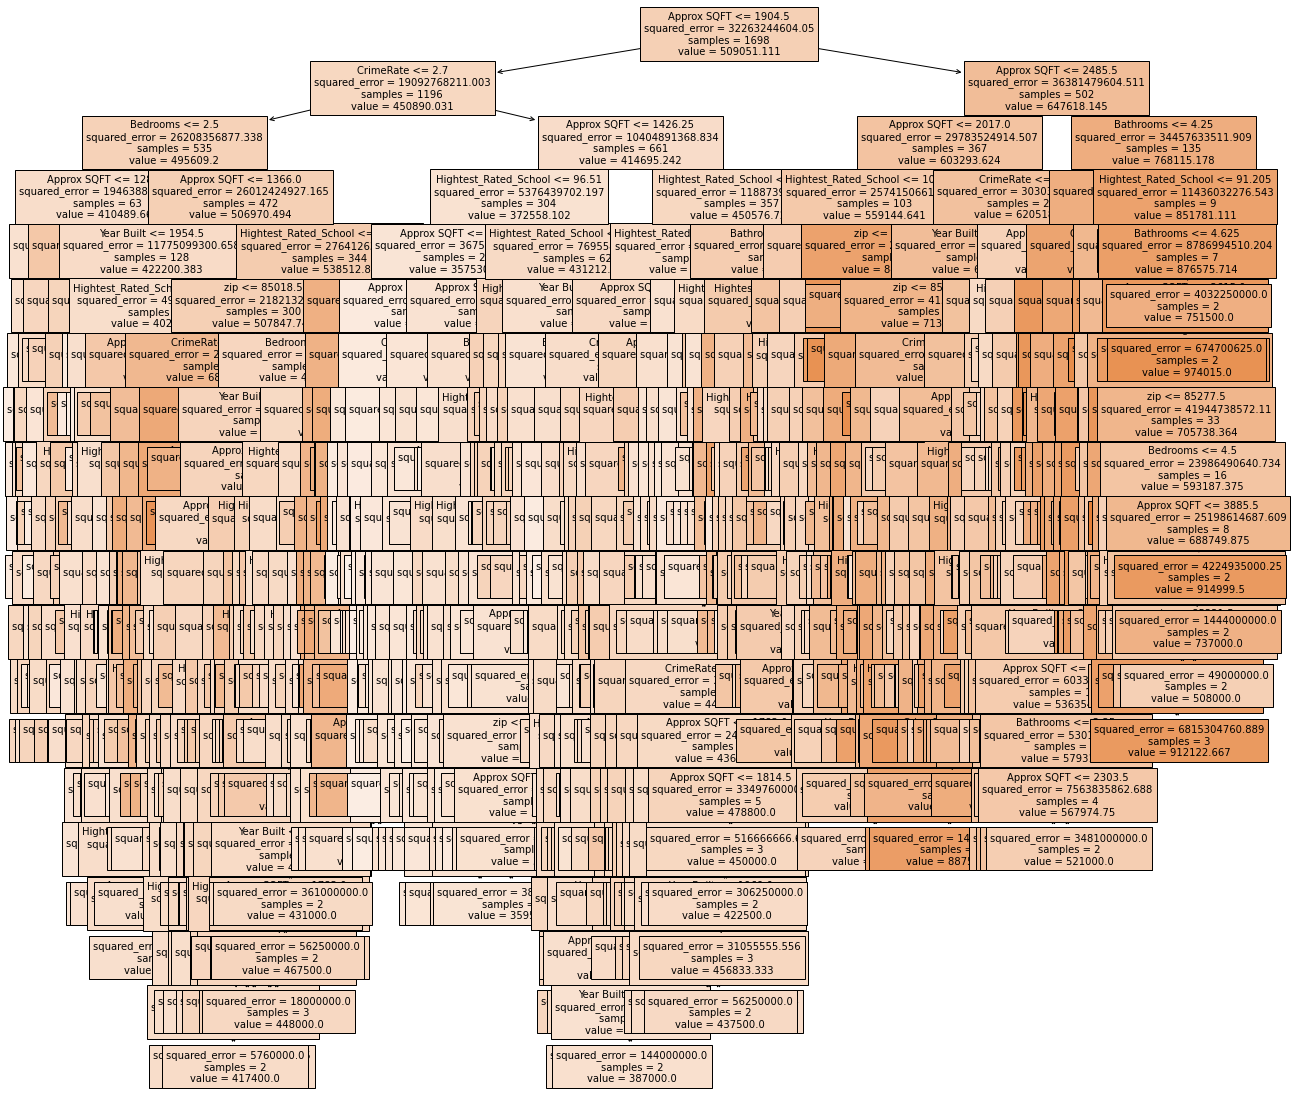

In [204]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf.estimators_[0], feature_names=X.columns, 
                   filled=True, fontsize = 10)
plt.show()